# Project 2
by:
- Rebecca Kuhlman
- Michael Amberg
- Sam Yao

## Business Understanding
Identifying the type of brain tumor a patient has is an important step in figuring out the treatment plan of a patient. They can be diagnosed via MRI imaging, leading to interest in using machine learning to diagnose the patient. Having a second opinion on brain tumor diagnoses would help improve patient care and outcomes, and lessen stress on doctors. A machine learning model could also speed up analysis time and pick out which patients are in need of urgent treatment.

In this dataset, there is glioma, meningioma, and pituitary tumors, as well as MRI images with no tumors.
Glioma tumors are usually malignant, while meningioma and pituitary tumors are usually benign. Different types of tumors are made of different types of cells and have a location where they are most likely to be located.
More information can be found at: https://www.mayoclinic.org/diseases-conditions/brain-tumor/symptoms-causes/syc-20350084

There are many other types of tumors that future algorithms will be need to address. The majority of other types of tumors are more common in children, while the set we are dealing with are all adult brain images.

Because the model deals with health conditions that have extreme affects on the patient, model accuracy is extremely important. Furthermore, accuracy must fine-tuned to avoid fatal misdiagnosis. While incorrectly marking a patient with a benign tumor as malignant is wasteful, the adverse affects are minimal. Inversely, misdiagnosing a malignant tumor as benign may have fatal effects for the patient. Therefore, the designed model must minimize the rate of false negatives with accuracy of 95% or more.

It should be noted that the majority of misdiagnose of brain tumors happen before a brain scan or related test is ordered.
https://paulandperkins.com/brain-tumors/


## Data Preparation

Several helpful sources that helped this part of the section include:
- [1] https://pillow.readthedocs.io/en/stable/handbook/tutorial.html
- [2] https://towardsdatascience.com/loading-custom-image-dataset-for-deep-learning-models-part-1-d64fa7aaeca6

In [1]:
import pandas as pd
import numpy as np
import os
from PIL import Image # Utilized Source [2]
import matplotlib.pyplot as plt

# This method creates the data, whether training or testing, in the form we desire
# Uses code from source [2] to create the training datasets
def create_dataset(img_folder):
    # Read through all files in "./Training"
    img_data_array= []
    class_name=[]
    for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder, dir1)):
            image_path= os.path.join(img_folder, dir1,  file)
            image= np.array(Image.open(image_path).convert("L").resize((512,512)))
            
            image = image.reshape((1,262144))    #Vectorizes each image
            image = image.astype('float64')
            image /= 255                   #Normalize Values
            img_data_array.append(image[0])
            class_name.append(dir1)
    # return array with training data.
    img_data_array = np.asarray(img_data_array, dtype=np.ndarray)
    return img_data_array, class_name

In [2]:
df_training, training_classes = create_dataset("./Training")
#df_testing, testing_classes = create_dataset("./Testing")

Here's a handy visualization to show part of our dataset

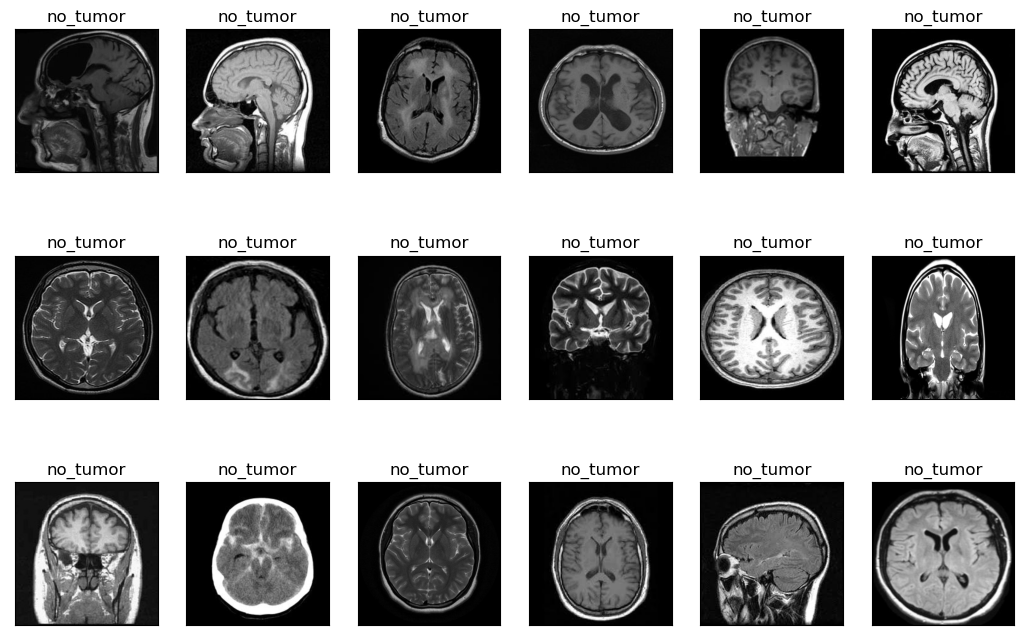

In [3]:
import random

# Helper Function to plot pictures
# Taken from Dr. Larson's Notebook
# Modified to show random images of tumors and their categories
def plot_gallery(images, titles, h, w, n_row=3, n_col=6):
    
    #r = random.randint(0,(2870 - (n_row * n_col))) #This part was added to randomly show tumor pics
    
    
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.7 * n_col, 2.3 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i+ 1)
        
        # Random dist. added here
        plt.imshow(images[i].reshape((h, w)).astype('float'), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        
        plt.xticks(())
        plt.yticks(())
plot_gallery(df_training, training_classes, 512, 512, 3, 6) # defaults to showing a 3 by 6 subset of the faces

## Data Reduction

PCA

Sources:
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html

In [4]:
# get some of the specifics of the dataset
#dfTrain = pd.DataFrame(df_training)
#dfTarget = pd.DataFrame(training_classes)

#The following code was also taken from Dr. Larson's '0.4 Dimension Reduction and Images' notebook
X = df_training
y = training_classes

n_samples, n_features = X.shape
h=w = 512 #modified for our images
n_classes = 4 #there are four classes of images

print("n_samples: {}".format(n_samples))
print("n_features: {}".format(n_features))
print("n_classes: {}".format(n_classes))
print("Original Image Sizes {} by {}".format(h,w))

n_samples: 2870
n_features: 262144
n_classes: 4
Original Image Sizes 512 by 512


In [56]:
# lets do some PCA of the features and go from 1850 features to 20 features
#The following code was also taken from Dr. Larson's '0.4 Dimension Reduction and Images' notebook
from sklearn.decomposition import PCA

n_components = 300 #We used the same number of components because the datasets were roughly similar in size
print ("Extracting the top %d eigentumors from %d tumors" % (
    n_components, X.shape[0]))

pca = PCA(n_components=n_components)
%time pca.fit(X.copy())
eigentumors = pca.components_.reshape((n_components, h, w))

Extracting the top 300 eigentumors from 2870 tumors
CPU times: user 7min 41s, sys: 1min 8s, total: 8min 50s
Wall time: 4min 38s


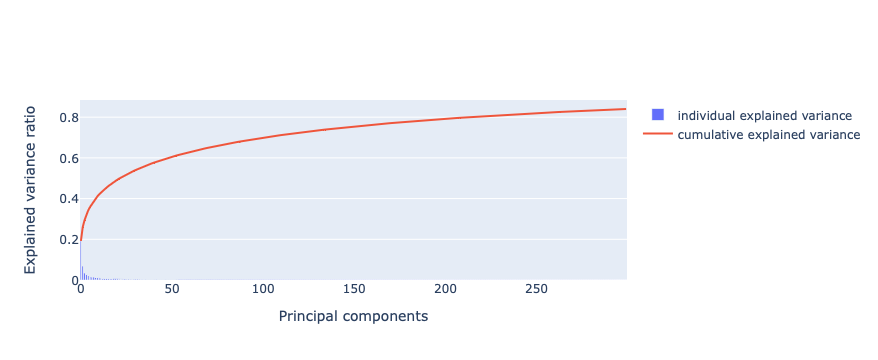

In [57]:
# The following code was also taken from Dr. Larson's '0.4 Dimension Reduction and Images' notebook
# This method was helpful in graphing out the explained variance
def plot_explained_variance(pca):
    import plotly
    from plotly.graph_objs import Bar, Line
    from plotly.graph_objs import Scatter, Layout
    from plotly.graph_objs.scatter import Marker
    from plotly.graph_objs.layout import XAxis, YAxis
    plotly.offline.init_notebook_mode() # run at the start of every notebook
    
    explained_var = pca.explained_variance_ratio_
    cum_var_exp = np.cumsum(explained_var)
    
    plotly.offline.iplot({
        "data": [Bar(y=explained_var, name='individual explained variance'),
                 Scatter(y=cum_var_exp, name='cumulative explained variance')
            ],
        "layout": Layout(xaxis=XAxis(title='Principal components'), yaxis=YAxis(title='Explained variance ratio'))
    })

plot_explained_variance(pca)

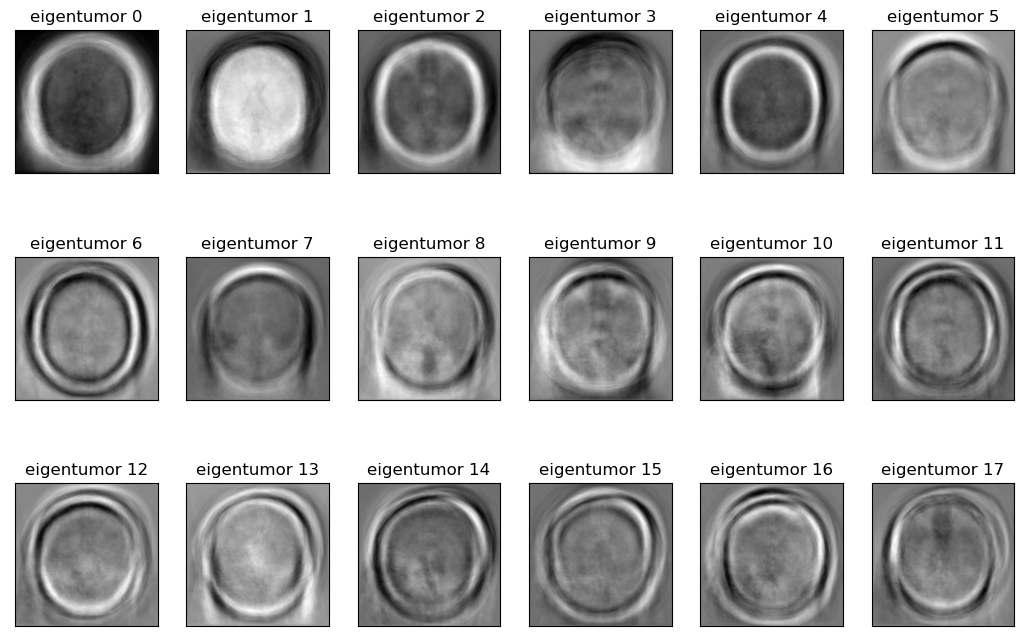

In [62]:
eigentumor_titles = ["eigentumor %d" % i for i in range(eigentumors.shape[0])]
plot_gallery(eigentumors, eigentumor_titles, h, w)

In [63]:
def reconstruct_image(trans_obj,org_features):
    low_rep = trans_obj.transform(org_features)
    rec_image = trans_obj.inverse_transform(low_rep)
    return low_rep, rec_image

idx_to_reconstruct = 1
X_idx = np.asarray(X[idx_to_reconstruct])
low_dimensional_representation, reconstructed_image = reconstruct_image(pca,X_idx.reshape(1, -1))

(262144,)


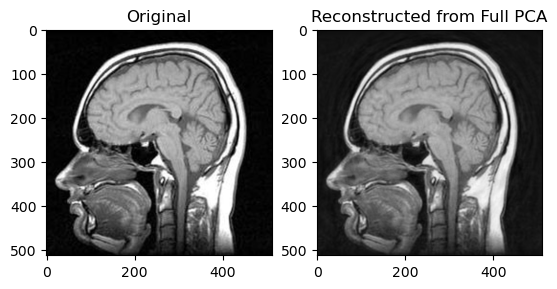

In [64]:
import matplotlib.pyplot as plt

print(X_idx.shape)

plt.subplot(1,2,1)
plt.imshow(X_idx.reshape((h, w)).astype('float'),cmap=plt.cm.gray)
plt.title('Original')
plt.grid(False)
plt.subplot(1,2,2)
plt.imshow(reconstructed_image.reshape((h, w)).astype('float'), cmap=plt.cm.gray)
plt.title('Reconstructed from Full PCA')
plt.grid(False)

 randomized principle components analysis. Visualize the explained variance of each component. Analyze how many dimensions are required to adequately represent your image data. Explain your analysis and conclusion.

In [6]:
from sklearn.decomposition import PCA

n_components = 300
print ("Extracting the top %d eigentumors from %d tumors" % (
    n_components, X.shape[0]))

rpca = PCA(n_components=n_components, svd_solver='randomized')
%time rpca.fit(X.copy())
eigentumors_random = rpca.components_.reshape((n_components, h, w))

Extracting the top 300 eigentumors from 2870 tumors
CPU times: user 14min 6s, sys: 1min 12s, total: 15min 18s
Wall time: 5min 34s


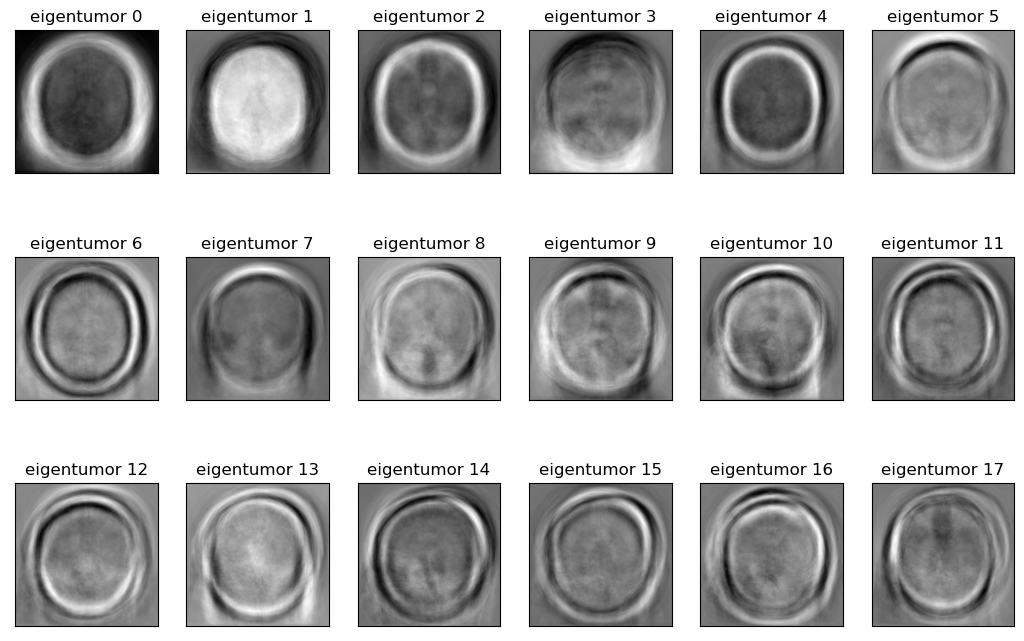

In [8]:
eigentumor_titles = ["eigentumor %d" % i for i in range(eigentumors_random.shape[0])]
plot_gallery(eigentumors_random, eigentumor_titles, h, w)

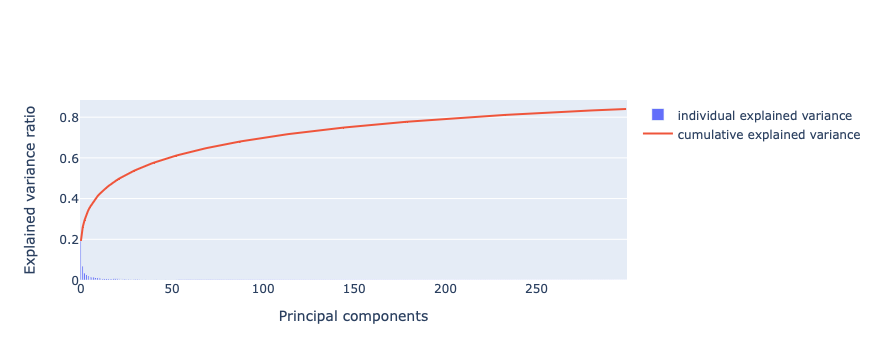

In [9]:
def plot_explained_variance(pca):
    import plotly
    from plotly.graph_objs import Bar, Line
    from plotly.graph_objs import Scatter, Layout
    from plotly.graph_objs.scatter import Marker
    from plotly.graph_objs.layout import XAxis, YAxis
    plotly.offline.init_notebook_mode() # run at the start of every notebook
    
    explained_var = pca.explained_variance_ratio_
    cum_var_exp = np.cumsum(explained_var)
    
    plotly.offline.iplot({
        "data": [Bar(y=explained_var, name='individual explained variance'),
                 Scatter(y=cum_var_exp, name='cumulative explained variance')
            ],
        "layout": Layout(xaxis=XAxis(title='Principal components'), yaxis=YAxis(title='Explained variance ratio'))
    })

plot_explained_variance(rpca)

Compare the representation using PCA and Randomized PCA. The method you choose to compare dimensionality methods should quantitatively explain which method is better at representing the images with fewer components.  Do you prefer one method over another? Why?

feature extraction upon the images using DAISY. Try different parameters for your image data.

In [ ]:
from skimage.feature import daisy

# lets first visualize what the daisy descriptor looks like
features, img_desc = daisy(img,
                           step=20,
                           radius=20,
                           rings=2,
                           histograms=8,
                           orientations=8,
                           visualize=True)
imshow(img_desc)
plt.grid(False)

In [ ]:
# now let's understand how to use it
features = daisy(img, step=20, radius=20, rings=2, histograms=8, orientations=4, visualize=False)
print(features.shape)
print(features.shape[0]*features.shape[1]*features.shape[2])

In [ ]:
# create a function to take in the row of the matrix and return a new feature
def apply_daisy(row,shape):
    feat = daisy(row.reshape(shape), step=20, radius=20,
                 rings=2, histograms=8, orientations=4,
                 visualize=False)
    return feat.reshape((-1))

%time test_feature = apply_daisy(X[3],(h,w))
test_feature.shape

In [ ]:
import copy
# find closest image to current image
idx1 = 5
distances = copy.deepcopy(dist_matrix[idx1,:])
distances[idx1] = np.infty # dont pick the same image!
idx2 = np.argmin(distances)

plt.figure(figsize=(7,10))
plt.subplot(1,2,1)
imshow(X[idx1].reshape((h,w)))
plt.title("Original Image")
plt.grid()

plt.subplot(1,2,2)
imshow(X[idx2].reshape((h,w)))
plt.title("Closest Image")
plt.grid()

Does this feature extraction method show promise for your prediction task? Why?
Use visualizations to analyze this questions. For example, use a heat map of the pairwise differences (ordered by class) among all extracted features. Another option, build a nearest neighbor classifier to see actual classification performance.

## Exceptional Work 😡

Additional feature extraction techniques(Gabor filters, keypoint matching, ordered gradients) Several are provided in the notebooks and you might research techniques known in the computer vision literature.
Does this feature extraction method show promise for your prediction task? Why?
Use visualizations to analyze this questions. For example, use a heat map of the pairwise differences (ordered by class) among all extracted features. Another option, build a nearest neighbor classifier to see actual classification performance.